<a href="https://colab.research.google.com/github/jx-dohwan/poc/blob/main/%EA%B0%84%EB%8B%A8%ED%95%9C_%EB%89%B4%EC%8A%A4_%EC%9A%94%EC%95%BD_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %cd /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/train
# ! unzip /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/train/TL1.zip

# %cd /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/val
# ! unzip /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/val/VL1.zip

참조 : https://wikidocs.net/72820

In [1]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-10-25 10:50:51--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-10-25 10:50:52--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45e405af417668d85b01e082e2.dl.dropboxusercontent.com/cd/0/get/BvfFIfUFJgfMpOQDFEuK2uKBe8pKd8heDsuhxYpV98CXIPtN_UI_GYyDt5IQy2zEMP5TplLFS_cWBvz60WGYANI-SaovtrVcVmPaIWiQ_s1nQfcoSq0BW3NTim5a4ZCE1Kdrsug17-OVW1OJmF5nctnwUpT_xbrOXqdeJVMHoNbhqBCUEGDg_IxJLAfnfgaPR9U/file?dl=1# [following]
--2022-10-25 10:50:52--  https://uc45e405af417668d85b01e082e2.dl.dropboxusercontent.com/cd/0/get/BvfFIfUFJg

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from konlpy.tag import Mecab
from collections import Counter
import re
import os
import random
import math
import urllib.request
import gensim
from gensim.models.keyedvectors import Word2VecKeyedVectors
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

mecab = Mecab()

In [53]:
import glob
import json
import os

File_List = glob.glob('/content/drive/MyDrive/인공지능/아이펠톤/PoC/data/val/01.news_r/20per/*.json')

val_summary = []
val_passage = []
for i in File_List:
    f = open(i,'r')
    js = json.loads(f.read())
    # file_list.append(js)
    #print("id : %s" % (js['Annotation']['summary1']))#['Meta(Refine)']['passage']
    val_summary.append(js['Annotation']['summary1'])
    val_passage.append(js['Meta(Refine)']['passage'])
    f.close()

In [54]:
File_List = glob.glob('/content/drive/MyDrive/인공지능/아이펠톤/PoC/data/train/01.news_r/20per/*.json')

train_summary = []
train_passage = []
for i in File_List:
    f = open(i,'r')
    js = json.loads(f.read())
    # file_list.append(js)
    #print("id : %s" % (js['Annotation']['summary1']))#['Meta(Refine)']['passage']
    train_summary.append(js['Annotation']['summary1'])
    train_passage.append(js['Meta(Refine)']['passage'])
    f.close()

In [55]:
print('전체 샘플 수 :', len(val_summary))
print('전체 샘플 수 :', len(val_passage))
print()
print('전체 샘플 수 :', len(train_summary))
print('전체 샘플 수 :', len(train_passage))

전체 샘플 수 : 1350
전체 샘플 수 : 1350

전체 샘플 수 : 10800
전체 샘플 수 : 10800


In [56]:
print(val_summary[100])
print()
print(val_passage[100])
print()
print(train_summary[100])
print()
print(train_passage[100])

정반대 대외정책을 가진 트럼프 대통령과 바이든 전 부통령이 대선 후보로 확정되며 미국 대선이 시작됐는데 국내 전문가는 한국 정부에겐 바이든, 트럼프 모두 숙제라고 했다.

도널드 트럼프 대통령과 조 바이든 전 부통령이 전당대회를 통해 각각 공화당과 민주당의 대선 후보로 공식 확정되면서 오는 11월 3일을 향한 미국 대선 레이스의 막이 올랐다.
  트럼프와 바이든의 대외정책 외양은 극과 극이다.
  트럼프 캠프는 공식 홈페이지에서 해외 주둔 미군을 복귀시키고, 동맹국들로부터 방위비를 더 받아내며 중국에 빼앗긴 일자리를 되찾아오겠다고 선언했다.
  민주당은 92쪽 분량의 대선 정강·정책에서 미국의 동맹 회복과 다자주의 체제 복원을 약속했다.
  한반도 문제를 놓곤 “북한 인권 문제를 제기하는 동시에 장기적인 관점에서 외교 캠페인을 펴겠다”고 언급했다.
  중앙일보는 29일 국내 외교·안보 전문가 5명에게 차기 미국 정부의 외교안보 정책 전망과 한국 정부의 과제를 물었다.
  트럼프건 바이든이건 모두 한국엔 숙제라는 답이 돌아왔다.
   바이든·김정은 만남은 기대 못해 미·중 경쟁 속 누가 더 한국을 압박할까.
 ▶전재성 서울대 정치외교학부 교수=트럼프는 중국 체제와 주권을 공격하는 신냉전론자인 반면, 바이든은 인권 문제 등 특정 행동을 문제삼는다는 데 결정적인 차이가 있다.
  바이든은 미국 중심의 세계 질서를 설정한 후 다자 협력체제로 중국을 포위할 거다.
 ▶김성한 고려대 국제대학원장=‘한국은 누구 편인가’라는 노골적인 말은 당연히 트럼프가 할 것이다.
  반면에 바이든 정부는 말은 부드러워도 조직적으로 압박해 올 것이라 미국 중심 질서에 한국을 편입하는가 마는가가 문제 될 것이다.
  따라서 압박 강도엔 차이가 없다.
  트럼프 재선 땐 주한미군 감축이 빨라지리라는 우려가 있다.
 ▶천영우 전 청와대 외교안보수석=트럼프는 한·미동맹에 대한 이해가 없고 이해하려고도 하지 않는다.
  충분히 가능하다.
 ▶전재성=트럼프건 바이든이건 미국이 동아시아 전략을 수정하

원본의 최소 길이 : 136
원본의 최대 길이 : 329
원본의 평균 길이 : 271.1024074074074
요약의 최소 길이 : 6
요약의 최대 길이 : 29
요약의 평균 길이 : 19.133518518518517


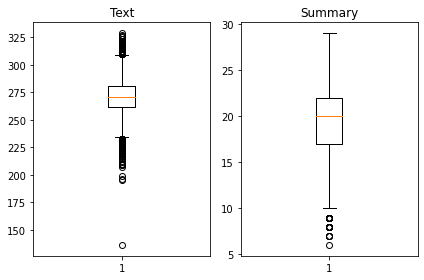

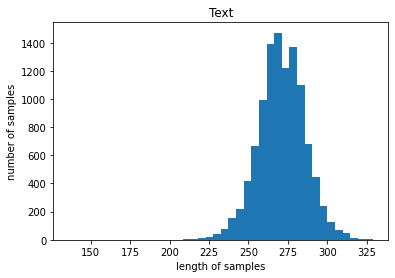

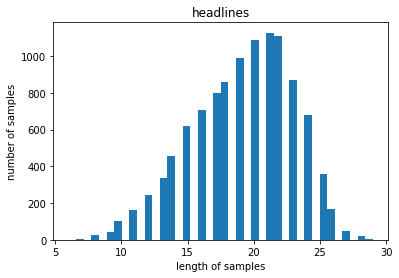

In [57]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in train_passage]
headlines_len = [len(s.split()) for s in train_summary]

print('원본의 최소 길이 : {}'.format(np.min(text_len)))
print('원본의 최대 길이 : {}'.format(np.max(text_len)))
print('원본의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [58]:
text_max_len = 300
summary_max_len  = 26

In [59]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(str(s).split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [60]:
below_threshold_len(text_max_len, train_passage)
below_threshold_len(summary_max_len,  train_summary)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 0.9748148148148148
전체 샘플 중 길이가 26 이하인 샘플의 비율: 0.9934259259259259


In [61]:
assert len(train_passage) == len(train_summary)

cleaned_corpus = list(set(zip(train_passage, train_summary)))

In [62]:
for pair in cleaned_corpus[:10]:
    print(pair)
    print('pair 0 :',pair[0])
    print('pair 1 :',pair[1])
    print(len(pair[0]))

(' 정수장 오존 농도 높이고, 세척 주기 단축  충북 청주에서는 지난 19~20일 흥덕구 가경동의 아파트와 비하동 상가, 상당구 용암동·금천동의 아파트 등 4곳에서 유충으로 보이는 벌레가 나왔다는 신고가 접수돼 당국이 긴급 조사에 나섰다.\n   청주시는 지북 정수장 1.\n 3m 깊이 모래여과지를 굴착기로 파내 여섯 군데서 시료를 채취해 검사했다.\n  채희준 청주시 정수팀장은 “3일에 한번씩 공기를 강하게 불어 모래여과지를 세척하는데, 횟수를 2일에 한번씩 하는 것으로 늘렸다”며 “6일에 1회씩 하는 활성탄 흡착지 세척작업도 3일마다 하는 것으로 방침을 바꿨다”고 말했다.\n   울산에서는 지난 17일 환경부와 합동점검한 결과 회야 정수장 활성탄 흡착지에서 유충 15마리가 발견됐다.\n  유충 15마리 중 14마리는 최종 오존 처리 등을 거치며 사체로 나왔다.\n  울산상수도사업본부는 지난 17일부터 회야와 천상 정수장의 활성탄 흡착지 전수조사를 추진 중이다.\n  현재까지는 이물질 발견 사례가 없는 것으로 조사됐다.\n  울산상수도사업본부 관계자는 “수돗물이 가정 수도꼭지로 전달되기 직전까지 정수지와 배수지 이물질 발생 여부를 24시간 지속 모니터링할 계획”이라고 말했다.\n   아직 수돗물 유충 발견 사례가 접수되지 않은 지역도 정수장 점검에 고삐를 죄고 있다.\n  인천과 경기 시흥·화성지역에서 입상활성탄 여과방식을 쓰다 여과지에서 유충이 발생한 것으로 추정됨에 따라 이와 유사한 방식을 운용하는 정수장들이 우선 점검 대상이 됐다.\n   충남의 경우 11개 정수장 가운데 활성탄 방식을 사용하는 곳은 공주와 예산 2곳이다.\n  공주(옥룡 정수장)는 인천 공촌 정수장과 같은 공정(입상방식)을 쓰는데, 현장 조사 결과 유충은 발견되지 않았다.\n  예산 정수장도 점검에서 특별한 이상은 나오지 않았다.\n   충남도는 한국수자원공사·자치단체 등과 협조, 공주 옥룡 정수장의 여과지 4개 중 2개를 올해 안에 우선 교체할 방침이다.\n  예산 등 나머지 10

In [63]:
def preprocess_sentence(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  sentence = mecab.morphs(sentence)
  #print(sentence)

  return sentence

In [64]:
def build_corpus(cleaned_corpus):
  train_passage_corpus = []
  train_summary_corpus = []
  for pair in cleaned_corpus:#[:num_examples]:
    passage = preprocess_sentence(pair[0])
    summary = preprocess_sentence(pair[1])
 
    train_passage_corpus.append(passage)
    train_summary_corpus.append(summary)

  return train_passage_corpus, train_summary_corpus

In [65]:
train_passage_corpus, train_summary_corpus = build_corpus(cleaned_corpus)

In [66]:
print(train_passage_corpus[100])

['키오스', '크', '에서', '안면', '을', '인식', '해', '가맹점', '어디', '에서', '나', '결제', '할', '수', '있', '는', '얼굴', '인증', '시스템', '으로', ',', '향후', '가맹점', '을', '더', '넓혀', '나갈', '예정', '이', '다', '.', '롯데카드', '가', '2017', '년', '도입', '한', '핸드', '페이', '는', '롯데마트', ',', '롯데', '리아', '등', '롯데', '계열사', '뿐', '아니', '라', '오크', '밸리', '워터', '파크', '등', '100', '여', '곳', '을', '가맹점', '으로', '두', '고', '있', '다', '.', '지난', '2', '일', '공정거래위', '원회', '가', '생체', '인증', '등', '으로', '예금', '지급', '이', '가능', '하', '도록', '허용', '한다', '는', '내용', '을', '골자', '로', '예금', '거래', '기본', '약관', '을', '개정', '하', '면서', '은행', '권', '의', '바이오', '인증', '서비스', '는', '더', '늘어날', '전망', '이', '다', '.', '그', '동안', '각', '은행', '은', '생체', '인증', '서비스', '를', '적용', '하', '기', '위해', '자체', '적', '으로', '금융', '감독원', '심사', '를', '거쳐', '개별', '약관', '을', '사용', '했', '지만', ',', '이제', '업계', '가', '공통', '적', '으로', '표준', '약관', '적용', '을', '받', '게', '된다', '.', '이미', '국민은행', '이', '지난해', '4', '월', '출시', '한', '손', '으로', '출금', '서비스', '는', '가입자', '수', '가', '100', '만', '명', '을', '넘', '었', '다', '.

In [67]:
print(train_passage_corpus[100])
print(train_summary_corpus[100])

print(len(train_passage_corpus))
print(len(train_summary_corpus))

['키오스', '크', '에서', '안면', '을', '인식', '해', '가맹점', '어디', '에서', '나', '결제', '할', '수', '있', '는', '얼굴', '인증', '시스템', '으로', ',', '향후', '가맹점', '을', '더', '넓혀', '나갈', '예정', '이', '다', '.', '롯데카드', '가', '2017', '년', '도입', '한', '핸드', '페이', '는', '롯데마트', ',', '롯데', '리아', '등', '롯데', '계열사', '뿐', '아니', '라', '오크', '밸리', '워터', '파크', '등', '100', '여', '곳', '을', '가맹점', '으로', '두', '고', '있', '다', '.', '지난', '2', '일', '공정거래위', '원회', '가', '생체', '인증', '등', '으로', '예금', '지급', '이', '가능', '하', '도록', '허용', '한다', '는', '내용', '을', '골자', '로', '예금', '거래', '기본', '약관', '을', '개정', '하', '면서', '은행', '권', '의', '바이오', '인증', '서비스', '는', '더', '늘어날', '전망', '이', '다', '.', '그', '동안', '각', '은행', '은', '생체', '인증', '서비스', '를', '적용', '하', '기', '위해', '자체', '적', '으로', '금융', '감독원', '심사', '를', '거쳐', '개별', '약관', '을', '사용', '했', '지만', ',', '이제', '업계', '가', '공통', '적', '으로', '표준', '약관', '적용', '을', '받', '게', '된다', '.', '이미', '국민은행', '이', '지난해', '4', '월', '출시', '한', '손', '으로', '출금', '서비스', '는', '가입자', '수', '가', '100', '만', '명', '을', '넘', '었', '다', '.

In [68]:
word2vec_file_path_lstm = '/content/drive/MyDrive/인공지능/아이펠/GoingDeeper/제출용/data/ko.bin'
ko_model = gensim.models.Word2Vec.load(word2vec_file_path_lstm)
ko_model.most_similar('사과')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('사죄', 0.5442899465560913),
 ('충고', 0.4946415424346924),
 ('질문', 0.48838865756988525),
 ('해명', 0.48268449306488037),
 ('대답', 0.4778830409049988),
 ('선처', 0.4665257930755615),
 ('질타', 0.4546084403991699),
 ('발언', 0.4542806148529053),
 ('회답', 0.45340797305107117),
 ('고소', 0.45193421840667725)]

In [69]:
def lexical_sub(sentence, word2vec):
    res = ""
    toks = sentence

    try:
        _from = random.choice(toks)
        _to = word2vec.most_similar(_from)[0][0]
        
    except:   # 단어장에 없는 단어
        return None

    for tok in toks:
        if tok is _from: res += _to + " "
        else: res += tok + " "

    return res

In [70]:
print(str(train_passage_corpus[100]))
test = lexical_sub(train_passage_corpus[100], ko_model)
print(type(test))
print(test.split())

['키오스', '크', '에서', '안면', '을', '인식', '해', '가맹점', '어디', '에서', '나', '결제', '할', '수', '있', '는', '얼굴', '인증', '시스템', '으로', ',', '향후', '가맹점', '을', '더', '넓혀', '나갈', '예정', '이', '다', '.', '롯데카드', '가', '2017', '년', '도입', '한', '핸드', '페이', '는', '롯데마트', ',', '롯데', '리아', '등', '롯데', '계열사', '뿐', '아니', '라', '오크', '밸리', '워터', '파크', '등', '100', '여', '곳', '을', '가맹점', '으로', '두', '고', '있', '다', '.', '지난', '2', '일', '공정거래위', '원회', '가', '생체', '인증', '등', '으로', '예금', '지급', '이', '가능', '하', '도록', '허용', '한다', '는', '내용', '을', '골자', '로', '예금', '거래', '기본', '약관', '을', '개정', '하', '면서', '은행', '권', '의', '바이오', '인증', '서비스', '는', '더', '늘어날', '전망', '이', '다', '.', '그', '동안', '각', '은행', '은', '생체', '인증', '서비스', '를', '적용', '하', '기', '위해', '자체', '적', '으로', '금융', '감독원', '심사', '를', '거쳐', '개별', '약관', '을', '사용', '했', '지만', ',', '이제', '업계', '가', '공통', '적', '으로', '표준', '약관', '적용', '을', '받', '게', '된다', '.', '이미', '국민은행', '이', '지난해', '4', '월', '출시', '한', '손', '으로', '출금', '서비스', '는', '가입자', '수', '가', '100', '만', '명', '을', '넘', '었', '다', '.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [71]:
def Augmentation_model(train_passage_corpus , train_summary_corpus, ko_model):
    new_train_passage_corpus = []
    new_train_summary_corpus = []

    for i in tqdm(range(len(train_passage_corpus))):
        new_que = lexical_sub(train_passage_corpus[i], ko_model)
        new_ans = lexical_sub(train_summary_corpus[i], ko_model)

        if new_que is not None: 
            new_train_passage_corpus.append(new_que.split())
            new_train_summary_corpus.append(train_summary_corpus[i])
        
        if new_ans is not None:
            new_train_summary_corpus.append(new_ans.split())
            new_train_passage_corpus.append(train_passage_corpus[i])
          
    print(new_train_passage_corpus[:100])
    print(new_train_summary_corpus[:100])

    return new_train_passage_corpus, new_train_summary_corpus

In [72]:
new_train_passage_corpus, new_train_summary_corpus = Augmentation_model(train_passage_corpus , train_summary_corpus, ko_model)

  0%|          | 0/10800 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[['정수장', '오존', '농도', '높이', '고', ',', '세', '척', '주기', '단축', '충북', '청주', '에서', '는', '지난', '19', '20', '일', '흥덕구', '가경동', '의', '아파트', '와', '비하동', '상가', ',', '상당구', '용암동', '금천동', '의', '아파트', '등', '4', '곳', '에서', '유충', '으로', '보이', '는', '벌레', '가', '나왔', '다는', '신고', '가', '접수', '돼', '당국', '이', '긴급', '조사', '에', '나섰', '다', '.', '청주시', '는', '지북', '정수장', '1', '.', '3', 'm', '깊이', '모래', '여과지', '를', '굴착기', '로', '파내', '여섯', '군데', '서', '시료', '를', '채취', '해', '검사', '했', '다', '.', '채희준', '청주시', '정수', '팀장', '은', '3', '일', '에', '한', '번', '씩', '공기', '를', '강하', '게', '불', '어', '모래', '여과지', '를', '세', '척하', '는데', ',', '횟수', '를', '2', '일', '에', '한', '번', '씩', '하', '는', '것', '으로', '늘렸', '다', '며', '6', '일', '에', '1', '회', '씩', '하', '는', '활성탄', '흡착', '지', '세', '척', '작업', '도', '3', '일', '마다', '하', '는', '것', '으로', '방침', '을', '바꿨', '다', '고', '말', '했', '다', '.', '울산', '에서', '는', '지난', '17', '일', '환경부', '와', '합동', '점검', '한', '결과', '회', '야', '정수장', '활성탄', '흡', '착지', '에서', '유충', '15', '마리', '가', '발견', '됐', '다', '.', '유충',

In [73]:
print(len(new_train_passage_corpus))
print(len(new_train_summary_corpus))

18931
18931


In [74]:
train_passage_corpus = train_passage_corpus + new_train_passage_corpus
train_summary_corpus = train_summary_corpus + new_train_summary_corpus

train_passage_corpus = train_passage_corpus + new_train_passage_corpus
train_summary_corpus = train_summary_corpus + new_train_summary_corpus

In [75]:
print(len(train_passage_corpus))
print(len(train_summary_corpus))

48662
48662


In [76]:

temp_corpus_input = []
temp_corpus_target = []

for sample_data in train_summary_corpus:
  temp_corpus_input.append(["sostoken"] + sample_data)
  temp_corpus_target.append(sample_data + ['eostoken'])

encoder_input = np.array(train_passage_corpus)
decoder_input = np.array(temp_corpus_input)
decoder_target = np.array(temp_corpus_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

In [77]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[40135 12025 17592 ... 45021  2043 33946]


In [78]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [79]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 9732


In [80]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 38930
훈련 레이블의 개수 : 38930
테스트 데이터의 개수 : 9732
테스트 레이블의 개수 : 9732


In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer 
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 

In [82]:
threshold = 15
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 77273
등장 빈도가 14번 이하인 희귀 단어의 수: 45297
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 31976
단어 집합에서 희귀 단어의 비율: 58.61944016668177
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2183089724636271


In [83]:
src_vocab = 30000
src_tokenizer = Tokenizer(num_words=src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [84]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[1172, 154, 69, 1401, 12, 828, 22, 15124, 5, 14512, 240, 10, 120, 11, 538, 1113, 3, 357, 11, 57, 2, 1, 971, 101, 828, 3, 881, 1083, 697, 5, 3394, 552, 42, 230, 4, 1080, 10, 835, 8, 23, 3, 69, 10353, 7, 258, 6, 237, 427, 5, 3721, 5, 23, 3, 289, 272, 3, 8060, 5, 676, 11, 16, 2, 1, 3, 289, 277, 205, 22, 4, 823, 169, 881, 17, 8983, 12, 181, 9, 26, 42, 8, 23, 19, 2564, 161, 2, 1, 2331, 120, 180, 198, 3129, 387, 22, 183, 443, 4, 3129, 1377, 1449, 289, 164, 18, 1231, 324, 2034, 28, 17, 4, 16681, 3437, 19, 27494, 2, 1, 687, 2131, 194, 69, 3, 175, 3940, 49, 9, 4, 780, 122, 5, 311, 14, 5, 112, 74, 19, 297, 97, 1, 1492, 64, 1454, 54, 2781, 2, 1, 3, 32, 129, 13, 9904, 35, 8984, 6382, 1524, 8, 126, 21, 1102, 3, 5010, 10, 881, 9, 4, 353, 658, 12, 5, 9706, 697, 3, 780, 106, 47, 66, 69, 6, 237, 121, 685, 17, 1518, 13, 666, 1082, 3, 4155, 4, 1454, 54, 7, 23749, 3, 55, 3372, 36, 2, 1, 3, 289, 397, 2072, 29, 16309, 1931, 12343, 7, 910, 3767, 29, 1931, 5907, 18405, 1788, 4, 697, 3, 82, 41, 69, 8, 1454, 1

In [85]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [86]:
threshold = 10
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 23169
등장 빈도가 9번 이하인 희귀 단어의 수: 13952
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9217
단어 집합에서 희귀 단어의 비율: 60.218395269541205
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.047838146601868


In [87]:
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[13, 5501, 100, 54, 1068, 4, 518, 1, 498, 2, 3370, 467, 45, 2124, 1131, 95, 7, 518, 22, 2, 56, 961, 1, 597, 3], [13, 21, 23, 119, 369, 20, 93, 868, 1, 253, 323, 24, 2, 170, 4856, 4, 8141, 110, 6673, 3570, 9, 720, 18, 17, 148, 2, 317, 11, 16, 5, 3], [13, 4731, 10, 942, 27, 18, 284, 15, 56, 4114, 365, 148, 158, 1277, 1, 1000, 6, 152, 7, 71, 138, 486, 272, 6, 217, 734, 4, 4731, 653, 4, 4114, 1, 671, 17, 820, 9, 3083, 19, 1589, 78, 34, 190, 15, 5, 3], [13, 4857, 10, 52, 99, 239, 10, 8142, 44, 3845, 1766, 1, 250, 11, 8560, 27, 18, 4858, 6146, 7, 695, 30, 1159, 1, 226, 895, 18, 577, 26, 38, 3767, 501, 15, 5, 3], [13, 81, 12, 296, 1, 806, 8, 4, 2347, 8143, 9, 309, 380, 2939, 4288, 20, 100, 69, 6, 806, 10, 1286, 201, 26, 36, 119, 1, 5028, 26, 38, 100, 6, 7, 107, 6404, 1681, 2, 473, 18, 2125, 10, 648, 5, 3]]
target
decoder  [[5501, 100, 54, 1068, 4, 518, 1, 498, 2, 3370, 467, 45, 2124, 1131, 95, 7, 518, 22, 2, 56, 961, 1, 597, 3, 14], [21, 23, 119, 369, 20, 93, 868, 1, 253, 323, 2

In [88]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 38930
훈련 레이블의 개수 : 38930
테스트 데이터의 개수 : 9732
테스트 레이블의 개수 : 9732


In [89]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

In [90]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [91]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [92]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [93]:
import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/20.%20Text%20Summarization%20with%20Attention/attention.py", filename="attention.py")
from attention import AttentionLayer

In [94]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 300, 128)     3840000     ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 300, 256),   394240      ['embedding_2[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [95]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [96]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
153/153 [==============================] - 635s 4s/step - loss: 6.0227 - val_loss: 5.4551
Epoch 2/50
153/153 [==============================] - 617s 4s/step - loss: 5.2011 - val_loss: 5.0440
Epoch 3/50
153/153 [==============================] - 615s 4s/step - loss: 4.8289 - val_loss: 4.7041
Epoch 4/50
153/153 [==============================] - 609s 4s/step - loss: 4.5531 - val_loss: 4.4609
Epoch 5/50
153/153 [==============================] - 608s 4s/step - loss: 4.3212 - val_loss: 4.3108
Epoch 6/50
153/153 [==============================] - 604s 4s/step - loss: 4.1290 - val_loss: 4.1435
Epoch 7/50
153/153 [==============================] - 609s 4s/step - loss: 3.9271 - val_loss: 3.9533
Epoch 8/50
153/153 [==============================] - 609s 4s/step - loss: 3.7510 - val_loss: 3.8126
Epoch 9/50
153/153 [==============================] - 609s 4s/step - loss: 3.5805 - val_loss: 3.6679
Epoch 10/50
153/153 [==============================] - 609s 4s/step - loss: 3.4221 - val_lo

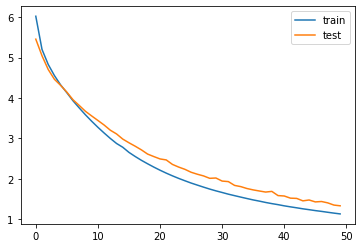

In [97]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [98]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [99]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [100]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [101]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [102]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [103]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + src_index_to_word[i]+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            sentence = sentence + tar_index_to_word[i] + ' '
    return sentence

In [104]:
for i in range(500, 1000):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 18ms/step
예측 요약문 :  은 중 의 2 . 2 로 에서 나 기 를 시작 했 고 면역 과 결과 2 . 1 로 확정 했 다 .


원문 :  시간 문재 인 대통령 의 남북 철도 도로 연결 과 개성 공단 금강산 관광 재개 구상 에 찬성 하 느냐 는 미국 의 소리 voa 방송 의 질의 에 모든 유엔 회원국 들 은 안보리 제재 결의 를 이행 해야 하 며 우리 는 모든 나라 가 그렇게 할 것 으로 기대 한다 고 답 했 다 . 문 대통령 은 앞서 지난 7 일 신년사 에 밝혔 던 남북 교류 협력 확대 구상 을 발표 했 는데 이 에 대해 명시 적 으로 찬반 입장 을 밝히 지 는 않 으면서 도 우회 적 으로 제재 유지 를 강조 한 것 으로 풀이 된다 . 이 관계자 는 개성 공단 금강산 관광 재개 가 비핵화 를 촉진 할 수 있 다는 주장 에 동의 하 느냐 는 voa 질의 에 도 미국 과 한국 은 북한 관련 노력 에 긴밀히 협력 하 고 유엔 제재 들 이 완전히 이행 되 도록 공조 하 고 있 다 고만 말 했 다 . 이 를 놓 고 정부 에 속도 조절 을 주문 했 다는 해석 이 나온다 . 앞서 해리 해리스 주한 미국 대사 도 문 대통령 의 신년사 뒤 가진 언론 인터뷰 에서 우리 는 남북 관계 의 성공 이나 진전 과 더불 어 비핵화 를 향한 진전 을 보 기 원한다 . 그것 이 중요 한 조건 이 라 생각 한다 고 말 했 다 . 정부 는 금강산 관광 사업 을 놓 곤 묘안 을 고심 중 이 다 . 문 대통령 은 과거 에 도 청와대 참모 진과 의 회의 석상 에서 개별 관광 은 대북 제재 에 해당 되 지 않 는다 며 김정은 위원장 도 알 고 북한 도 알 고 있 으니 , 우리 가 방법 을 찾 을 수 있 지 않 겠 느냐 는 취지 로 지시 했 다고 한다 . 
실제 요약문 : 을 기대 했으나 우리 정부 는 제재 상황 에서 도 협력 사업 에 속도 를 내려 구체

In [105]:
print("원문 : ",seq2text(encoder_input_test[150]))
print("실제 요약문 :",seq2summary(decoder_input_test[150]))
print("예측 요약문 :",decode_sequence(encoder_input_test[150].reshape(1, text_max_len)))
print("\n")

원문 :  사실 이 알려 지 자 디스 코드 에서 도 탈출 이 이어졌 다는 설명 이 다 . 현재 112 개 채널 중 80 개 가 사라졌 고 , 30 만 명 가량 중 20 만 명 이 자취 를 감췄 다고 한다 . n 번방 범죄 를 저지르 다 잘못 을 뉘우치 고 수사 기관 에 협력 하 고 있 다는 가명 씨 는 라인 단체 방 , 트위터 등 에서 계속 범죄 가 이어지 고 있 다 고 말 했 다 . 텔레 그램 여전 영상 방 관심 있 나 원조 메신저 격 인 텔레 그램 에선 범죄 가 줄 긴 했 지만 여전히 비슷 한 유형 의 범행 이 자행 되 고 있 는 모습 도 보인다 . 대신 가입 절차 가 강화 된 분위기 다 . 기자 가 김 씨 의 도움 을 받 아 자료 판매 방 에 들어가 니 한 참여 자 로부터 자료 구매 에 관심 이 있 느냐 는 메시지 가 왔 다 . 문화 상품권 으로 입장료 를 지불 하 면 동영상 을 볼 수 있 는 별도 의 방 으로 초대 해 주 겠 다는 설명 이 었 다 . 가격 은 vip 방 5 만 원 , 블랙 방 7 만 원 이 었 다 . 블랙 방 이 더 비싼 건 동영상 수 가 많 기 때문 이 라고 한다 . 대피소 방 , 보안 가이드 방 , 방 이 밖 에 도 강화 된 단 을 피해 대기 할 목적 으로 만들 어 진 대피소 방 , 경찰 수사 를 받 을 때 대응 요령 을 안내 하 는 보안 가이드 방 , 쉴 새 없이 생성 됐 다 사라졌 다 하 는 수많 은 방 의 현황 을 한눈 에 파악 하 고 들어갈 수 있 도록 돕 는 방 등 이 활동 중 이 다 . 
실제 요약문 : 번방 으로 상징 되 는 온라인 메신저 성 착취 범죄 가 코드 , 라인 단체 방 , 트위터 등 으로 계속 이어지 고 있 다 . 
1/1 [==============================] - 0s 18ms/step
예측 요약문 :  코로나 19 로 멈췄 던 ai 비 공개 가 시작 되 면서 미국 의 메신저 가 상징 되 자 .


